In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys
import numpy as np
import warnings

code_dir = os.path.join(os.path.abspath(os.pardir), 'prepare_dataset')

sys.path.append(code_dir)
sys.path.append(os.path.join(code_dir, 'struct2depth'))
sys.path.append(os.path.join(code_dir, 'tfoptflow/tfoptflow'))

warnings.simplefilter('ignore')

In [4]:
image_directory = None
depth_directory = None
video_path = None
json_path = None
csv_path = None
txt_path = None

optical_flow_estimator_name = 'pwc'
optical_flow_checkpoint = '/Vol0/user/f.konokhov/tfoptflow/tfoptflow/models/pwcnet-lg-6-2-multisteps-chairsthingsmix/pwcnet.ckpt-595000'

depth_estimator_name = 'struct2depth'
depth_checkpoint = os.path.join(code_dir, 'struct2depth/model/model-199160')
#depth_estimator_name = 'senet'

computation_kwargs = dict(
    cuda_visible_devices=3,
)

In [5]:
from dataset_builder import *

In [6]:
# build_from = DIRECTORY
# build_from = VIDEO
# build_from = CSV
# build_from = KITTI
# build_from = DISCOMAN
build_from = TUM

In [7]:
if build_from == VIDEO:
    sequence_directory = 'test_build_from_video'
    video_path = '/Vol1/dbstore/datasets/saic_odometry/07/t_video5316726383492203313.mp4'
    DatasetBuilder = VideoDatasetBuilder

if build_from == DIRECTORY:
    sequence_directory = 'test_build_from_dir'
    image_directory = '/Vol1/dbstore/datasets/KITTI_odometry_2012/dataset/sequences/00/image_2'
    DatasetBuilder = ImagesDatasetBuilder
    
if build_from == CSV:
    sequence_directory = 'test_build_from_csv'
    csv_path = ''
    DatasetBuilder = CSVDatasetBuilder

if build_from == KITTI:
    sequence_directory = 'test_build_kitti'
    image_directory = '/Vol1/dbstore/datasets/KITTI_odometry_2012/dataset/sequences/00/image_2'
    depth_directory = '/Vol1/dbstore/datasets/KITTI_odometry_2012/dataset/sequences/00/depth_2'
    depth_estimator_name = None
    DatasetBuilder = KITTIDatasetBuilder
    
if build_from == DISCOMAN:
    sequence_directory = 'test_build_discoman'
    json_path = '/Vol1/dbstore/datasets/renderbox/v10.5/traj/output/train/0000/0_traj.json'
    depth_estimator_name = None
    DatasetBuilder = DISCOMANDatasetBuilder
    
if build_from == TUM:
    sequence_directory = 'test_build_tum'
    txt_path = '/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd_dataset_freiburg2_coke/groundtruth.txt'
    DatasetBuilder = TUMDatasetBuilder

In [8]:
estimate_optical_flow = optical_flow_estimator_name is not None
estimate_depth = depth_estimator_name is not None

### Initialize

In [9]:
builder = DatasetBuilder(sequence_directory, 
                         build_from=build_from,
                         image_directory=image_directory,
                         depth_directory=depth_directory,
                         video_path=video_path,
                         json_path=json_path,
                         csv_path=csv_path,
                         txt_path=txt_path,
                         mode=DatasetBuilder.TEST,
                         estimate_optical_flow=estimate_optical_flow,
                         optical_flow_estimator_name=optical_flow_estimator_name,
                         optical_flow_checkpoint=optical_flow_checkpoint,
                         estimate_depth=estimate_depth,
                         depth_estimator_name=depth_estimator_name,
                         depth_checkpoint=depth_checkpoint,
                         memory_safe=True,
                         **computation_kwargs)
builder

DatasetBuilder(dir=test_build_tum, build_from=TUM,
            image_dir=None, depth_dir=test_build_tum/depth, csv_filename=df.csv,
            video_path=None, json_path=None, csv_path=None,
            mode=test, image_height=None, image_width=None, stride=1, fps=30,
            optical_flow=True, optical_flow_estimator=pwc, optical_flow_checkpoint=/Vol0/user/f.konokhov/tfoptflow/tfoptflow/models/pwcnet-lg-6-2-multisteps-chairsthingsmix/pwcnet.ckpt-595000,
            depth=True, depth_estimator=struct2depth, depth_checkpoint=/Vol0/user/a.vorontsova/odometry/prepare_dataset/struct2depth/model/model-199160,
            cuda_visible_devices=3

### Build

In [10]:
builder._configure()

In [11]:
if builder.build_from == VIDEO:
    print(builder.video_parser)

if builder.build_from == DIRECTORY:
    pass
    
if builder.build_from == CSV:
    pass

if builder.build_from == KITTI:
    pass

if builder.build_from == DISCOMAN:
    print(builder.parser)
    
if builder.build_from == TUM:
    print(builder.parser)    

TUMParser(dir=test_build_tum, txt_path=/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd_dataset_freiburg2_coke/groundtruth.txt, global_csv_filename=global.csv, relative_csv_filename=relative.csv, stride=1)


In [12]:
builder

DatasetBuilder(dir=test_build_tum, build_from=TUM,
            image_dir=/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd_dataset_freiburg2_coke/rgb, depth_dir=test_build_tum/depth, csv_filename=df.csv,
            video_path=None, json_path=None, csv_path=None,
            mode=test, image_height=None, image_width=None, stride=1, fps=30,
            optical_flow=True, optical_flow_estimator=pwc, optical_flow_checkpoint=/Vol0/user/f.konokhov/tfoptflow/tfoptflow/models/pwcnet-lg-6-2-multisteps-chairsthingsmix/pwcnet.ckpt-595000,
            depth=True, depth_estimator=struct2depth, depth_checkpoint=/Vol0/user/a.vorontsova/odometry/prepare_dataset/struct2depth/model/model-199160,
            cuda_visible_devices=3

In [13]:
print(builder.dataframe.shape)
builder.dataframe.head()

(2471, 10)


,path_to_rgb,path_to_next_rgb,path_to_depth,path_to_next_depth,euler_x,euler_y,euler_z,x,y,z
0,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000
1,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,0.001871,0.000610,0.001220,0.001311,-0.001216,-0.000462
2,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,0.007228,0.002285,0.000143,0.001866,-0.001953,-0.000558
3,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,0.000012,-0.000935,-0.001610,0.001685,-0.001893,-0.000310
4,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,-0.002096,-0.000225,-0.005699,0.002247,-0.000182,-0.000780


In [14]:
!nvidia-smi

Tue May 21 13:56:09 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.40.04    Driver Version: 418.40.04    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P40           Off  | 00000000:04:00.0 Off |                  Off |
| N/A   51C    P0   239W / 250W |  17116MiB / 24451MiB |     39%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla P40           Off  | 00000000:06:00.0 Off |                  Off |
| N/A   50C    P0   171W / 250W |  17785MiB / 24451MiB |     95%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [15]:
builder.build() # "Do everything" big red button

Estimate depth
Model:   <class 'estimator.Struct2DepthEstimator'>
Weights: /Vol0/user/a.vorontsova/odometry/prepare_dataset/struct2depth/model/model-199160
Output:  test_build_tum/depth


Computation settings:



Using TensorFlow backend.


CUDA visible devices:     3
Available GPUs:           /job:localhost/replica:0/task:0/device:GPU:0
Allow growth:             True
GPU memory fraction:      0.33
Number of CPU:            8
Number of CPU threads:    16

Random seed:              42



Instructions for updating:
Colocations handled automatically by placer.


W0521 13:56:51.843425 47330927824512 deprecation.py:323] From /Vol0/user/a.vorontsova/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use keras.layers.batch_normalization instead.


W0521 13:56:51.905900 47330927824512 deprecation.py:323] From /Vol0/user/a.vorontsova/odometry/prepare_dataset/struct2depth/nets.py:503: batch_normalization (from tensorflow.python.layers.normalization) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.batch_normalization instead.
W0521 13:56:54.725921 47330927824512 util.py:204] Shape mismatch, will not restore egomotion_prediction/pose_exp_net/pose/cnv6/weights.
W0521 13:56:54.727954 47330927824512 util.py:206] The following variables in the checkpoint were not loaded:


Instructions for updating:
Please switch to tf.train.MonitoredTrainingSession


W0521 13:56:54.868174 47330927824512 deprecation.py:323] From /Vol0/user/a.vorontsova/odometry/prepare_dataset/estimator.py:90: Supervisor.__init__ (from tensorflow.python.training.supervisor) is deprecated and will be removed in a future version.
Instructions for updating:
Please switch to tf.train.MonitoredTrainingSession


INFO:tensorflow:Running local_init_op.


I0521 13:57:07.781290 47330927824512 session_manager.py:491] Running local_init_op.


INFO:tensorflow:Done running local_init_op.


I0521 13:57:07.866348 47330927824512 session_manager.py:493] Done running local_init_op.


INFO:tensorflow:Starting standard services.


I0521 13:57:09.136020 47330927824512 supervisor.py:733] Starting standard services.


INFO:tensorflow:Starting queue runners.


I0521 13:57:09.152907 47330927824512 supervisor.py:740] Starting queue runners.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


W0521 13:57:09.154386 47330927824512 deprecation.py:323] From /Vol0/user/a.vorontsova/miniconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1266: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from /Vol0/user/a.vorontsova/odometry/prepare_dataset/struct2depth/model/model-199160


I0521 13:57:09.156574 47330927824512 saver.py:1270] Restoring parameters from /Vol0/user/a.vorontsova/odometry/prepare_dataset/struct2depth/model/model-199160


Estimate optical flow
Model:   <class 'estimator.PWCOpticalFlowEstimator'>
Weights: /Vol0/user/f.konokhov/tfoptflow/tfoptflow/models/pwcnet-lg-6-2-multisteps-chairsthingsmix/pwcnet.ckpt-595000
Output:  test_build_tum/optical_flow_stride1


Computation settings:



Using TensorFlow backend.


CUDA visible devices:     3
Available GPUs:           /job:localhost/replica:0/task:0/device:GPU:0
Allow growth:             True
GPU memory fraction:      0.33
Number of CPU:            8
Number of CPU threads:    16

Random seed:              42



Building model...
Instructions for updating:
Use keras.layers.conv2d instead.


W0521 13:59:49.552855 47330927824512 deprecation.py:323] From /Vol0/user/a.vorontsova/tfoptflow/tfoptflow/model_pwcnet.py:1094: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.conv2d instead.


Instructions for updating:
Colocations handled automatically by placer.


W0521 13:59:49.573522 47330927824512 deprecation.py:323] From /Vol0/user/a.vorontsova/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use keras.layers.conv2d_transpose instead.


W0521 13:59:51.533160 47330927824512 deprecation.py:323] From /Vol0/user/a.vorontsova/tfoptflow/tfoptflow/model_pwcnet.py:1221: conv2d_transpose (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.conv2d_transpose instead.


... model built.
Loading model checkpoint /Vol0/user/f.konokhov/tfoptflow/tfoptflow/models/pwcnet-lg-6-2-multisteps-chairsthingsmix/pwcnet.ckpt-595000 for eval or testing...

Instructions for updating:
Use standard file APIs to check for files with this prefix.


W0521 13:59:57.052726 47330927824512 deprecation.py:323] From /Vol0/user/a.vorontsova/miniconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1266: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from /Vol0/user/f.konokhov/tfoptflow/tfoptflow/models/pwcnet-lg-6-2-multisteps-chairsthingsmix/pwcnet.ckpt-595000


I0521 13:59:57.111179 47330927824512 saver.py:1270] Restoring parameters from /Vol0/user/f.konokhov/tfoptflow/tfoptflow/models/pwcnet-lg-6-2-multisteps-chairsthingsmix/pwcnet.ckpt-595000


... model loaded
Estimator(dir=test_build_tum/optical_flow_stride1, image_manager=ImageManager(dir=/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd_dataset_freiburg2_coke/rgb, image_height=480, image_width=640, stride=1, sample=True, step=1), checkpoint=/Vol0/user/f.konokhov/tfoptflow/tfoptflow/models/pwcnet-lg-6-2-multisteps-chairsthingsmix/pwcnet.ckpt-595000)


Optical flow estimation: 100%|██████████| 2471/2471 [04:07<00:00, 11.18it/s]


In [16]:
!nvidia-smi

Tue May 21 14:04:20 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.40.04    Driver Version: 418.40.04    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P40           Off  | 00000000:04:00.0 Off |                  Off |
| N/A   51C    P0    87W / 250W |  17116MiB / 24451MiB |     69%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla P40           Off  | 00000000:06:00.0 Off |                  Off |
| N/A   49C    P0   103W / 250W |  17785MiB / 24451MiB |     99%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [17]:
print(builder.dataframe.shape)
builder.dataframe.head()

(2471, 11)


,path_to_rgb,path_to_next_rgb,path_to_depth,path_to_next_depth,euler_x,euler_y,euler_z,x,y,z,path_to_optical_flow
0,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,test_build_tum/depth/1311871922.668414.npy,test_build_tum/depth/1311871922.704296.npy,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,test_build_tum/optical_flow_stride1/1311871922...
1,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,test_build_tum/depth/1311871922.704296.npy,test_build_tum/depth/1311871922.768435.npy,0.001871,0.000610,0.001220,0.001311,-0.001216,-0.000462,test_build_tum/optical_flow_stride1/1311871922...
2,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,test_build_tum/depth/1311871922.768435.npy,test_build_tum/depth/1311871922.804294.npy,0.007228,0.002285,0.000143,0.001866,-0.001953,-0.000558,test_build_tum/optical_flow_stride1/1311871922...
3,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,test_build_tum/depth/1311871922.804294.npy,test_build_tum/depth/1311871922.868333.npy,0.000012,-0.000935,-0.001610,0.001685,-0.001893,-0.000310,test_build_tum/optical_flow_stride1/1311871922...
4,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,/Vol1/dbstore/datasets/tum_rgbd_flow/data/rgbd...,test_build_tum/depth/1311871922.868333.npy,test_build_tum/depth/1311871922.904308.npy,-0.002096,-0.000225,-0.005699,0.002247,-0.000182,-0.000780,test_build_tum/optical_flow_stride1/1311871922...


### Visualize

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load(path):
    if path.endswith('npy'):
        return np.load(path)
    return cv2.imread(path)[:, :, ::-1]


def visualize_depth(depth):
    plt.imshow(depth[..., 0], cmap='RdBu')
    plt.show()

def visualize_optical_flow(optical_flow):
    fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
    ax[0].imshow(optical_flow[..., 0], cmap='RdBu')
    ax[1].imshow(optical_flow[..., 1], cmap='RdBu')
    plt.show()

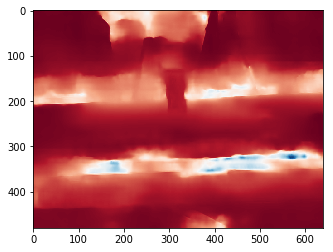

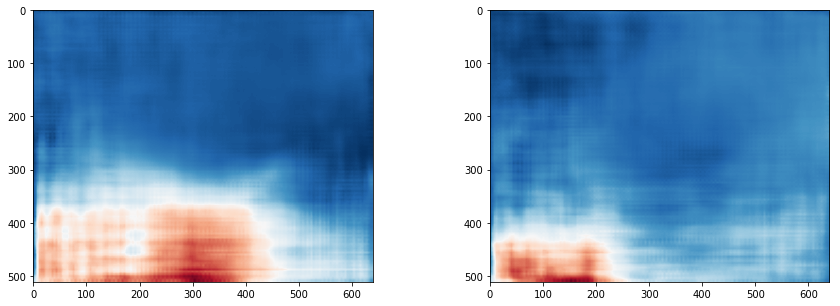

In [19]:
index = 0
visualize_depth(load(builder.dataframe.path_to_depth[index]))
visualize_optical_flow(load(builder.dataframe.path_to_optical_flow[index]))